# About this assignment
1. I have implemented the simple Kalman filter according to the powerpoint provided.
2. The results are **more accurate** than what the excel sheet provided! However, looking through the results of the mathcad implementation, it looks like that one is closer to what I have implemented.
3. The first cell downloads the packages incase these are not installed. 
4. The first cell also saves the data from the excel sheet to memory. If you extract the zip file and run this notebook from the extracted location, it should work directly.

# Load the data and install packages

In [ ]:
%pip install pandas numpy openpyxl
import pandas as pd
import numpy as np

# Load the Excel file
file_path = '4 - KF Assignment 1 data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
df.head()

,Measured position data,Corrected position data after KF
0,2.003680,0.000000
1,-7.464139,0.005000
2,7.215732,0.020000
3,-5.316463,0.044999
4,-4.485683,0.079997


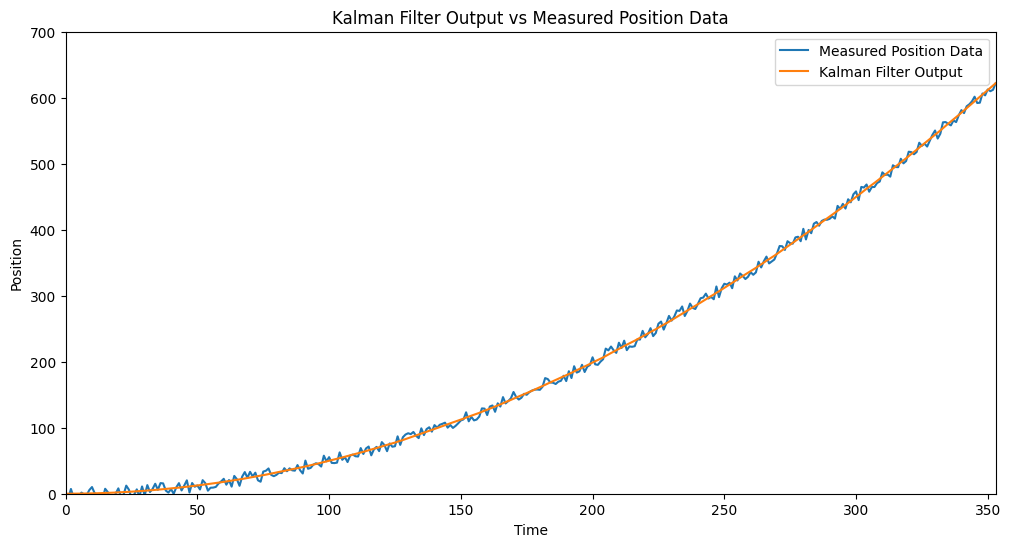

In [63]:
first_column = df.iloc[:, 0].values

def kalman_filter(data):
  sample_time = 0.1
  process_variance = 0.2
  measurement_variance = 10
  S_z = measurement_variance ** 2
  S_w = [[10e-6, 2.10e-5],
         [2.10e-5, 4.10e-4]]
  
  P = np.array([[0, 0], [0, 0]])
  A = np.array([[1, sample_time], [0, 1]])  
  B = np.array([[0.5 * sample_time ** 2], [sample_time]])  
  C =  np.array([[1, 0]])

  
  x = np.array([[0], [0]])
  u = 1
  x_history = []
  x_history.append(x)
  for i in range(1, len(data)):
    K = A @ P @ C.T @ np.linalg.inv(C @ P @ C.T + S_z)
    x = A @ x + B * u + K * (data[i] - C @ A @ x)
    P = A @ P @ A.T + S_w - A @ P @ C.T * (S_z**-1) @ C @ P @ A.T
    # P = A @ P @ A.T + S_w - K @ C @ P @ A.T
    
    x_history.append(x)
    
  return x_history

output = kalman_filter(first_column)

import matplotlib.pyplot as plt

output_array = np.array(output).squeeze()

plt.figure(figsize=(12, 6))
plt.xlim(0, 353)
plt.ylim(0, 700)
plt.plot(first_column, label='Measured Position Data')
plt.plot(output_array[:, 0], label='Kalman Filter Output')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Kalman Filter Output vs Measured Position Data')
plt.show()

## Position 

In [ ]:
# Extract the second column from the dataframe
corrected_position_data = df['Corrected position data after KF'].values

# Convert the output list to a numpy array if not already done
output_array = np.array(output).squeeze()
real_pos = [0.5*(i*0.1)**2 for i in range(len(output_array))]
error_array = real_pos - output_array[:, 0]
# Create a new dataframe to hold the corrected position data and Kalman filter output
result_df = pd.DataFrame({
    'Kalman Filter Output': output_array[:, 0],
    'Corrected Position Data': corrected_position_data,
    'Real Position': real_pos,   
    'Error:': error_array
})

# Display the whole table
result_df

,Kalman Filter Output,Corrected Position Data,Real Position,Error:
0,0.000000,0.000000,0.000,0.000000e+00
1,0.005000,0.005000,0.005,0.000000e+00
2,0.020001,0.020000,0.020,-8.712885e-07
3,0.044999,0.044999,0.045,9.379613e-07
4,0.079995,0.079997,0.080,4.957406e-06
5,0.124988,0.124991,0.125,1.202714e-05
6,0.179990,0.179992,0.180,1.023572e-05
7,0.244982,0.244986,0.245,1.755469e-05
8,0.319966,0.319973,0.320,3.353064e-05
9,0.405009,0.405011,0.405,-9.027810e-06
